In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
df = pd.read_csv('data/AB_NYC_2019.csv')
print('Размер выборки:', df.shape)# смотрим на её размеры 
df.head( ) # Смотрим что лежит в табличке 

Размер выборки: (48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [4]:
#проверяю, есть ли нулевые цены
t = df[df.price < 1] 
print('Размер выборки:', t.shape)
t.head()

Размер выборки: (11, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73


In [5]:
#ага, раз они есть, то дропну их
df = df[df.price >= 1]
print('Размер выборки:', df.shape)
df.head()

Размер выборки: (48884, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10051
reviews_per_month                 10051
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
df[df.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


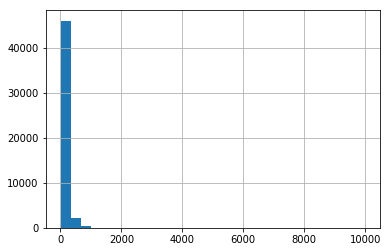

In [8]:
df.price.hist(bins=30);

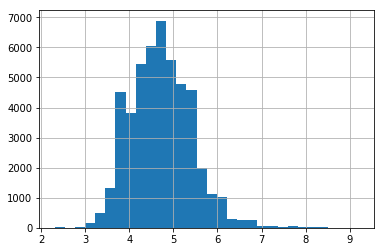

In [9]:
df['price'] = np.log(df['price'])
df.price.hist(bins=30);

__вот где-то тут будем издеваться над координатами__
<br>
значит так, возьмем за центр Площадь Колумба
http://afisha.nyc/ploshhad-kolumba-istinnyj-tsentr-nyu-jorka/

у нее координаты:
Latitude	40.715054
Longitude	-74.000084

In [10]:
from math import radians, cos, sin, asin, sqrt

#по хардкору будем вычислять расстояние, учитывая окружность Земли
#https://en.wikipedia.org/wiki/Haversine_formula
def haversine(row):
    long_c = -74.000084
    lat_c = 40.715054
    
    # convert decimal degrees to radians
    long_c, lat_c, long_p, lat_p = map(radians, (long_c, lat_c, row['longitude'], row['latitude']))

    # haversine formula
    dlon = long_c - long_p
    dlat = lat_c - lat_p
    a = sin(dlat / 2) ** 2 + cos(lat_p) * cos(lat_c) * sin(dlon / 2) ** 2
    c = 2 * asin(sqrt(a))
    km = 6367 * c
    return km

In [11]:
df['distance_to_center'] = df.apply(haversine, axis = 1)

In [12]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,distance_to_center
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,5.003946,1,9,2018-10-19,0.21,6,365,7.862918
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,5.416100,1,45,2019-05-21,0.38,2,355,4.500431
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,5.010635,3,0,NaN,NaN,1,365,11.533367
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,4.488636,1,270,2019-07-05,4.64,1,194,4.753027
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,4.382027,10,9,2018-11-19,0.10,1,0,10.406881


In [13]:
df = df.drop(['latitude','longitude'], axis=1)

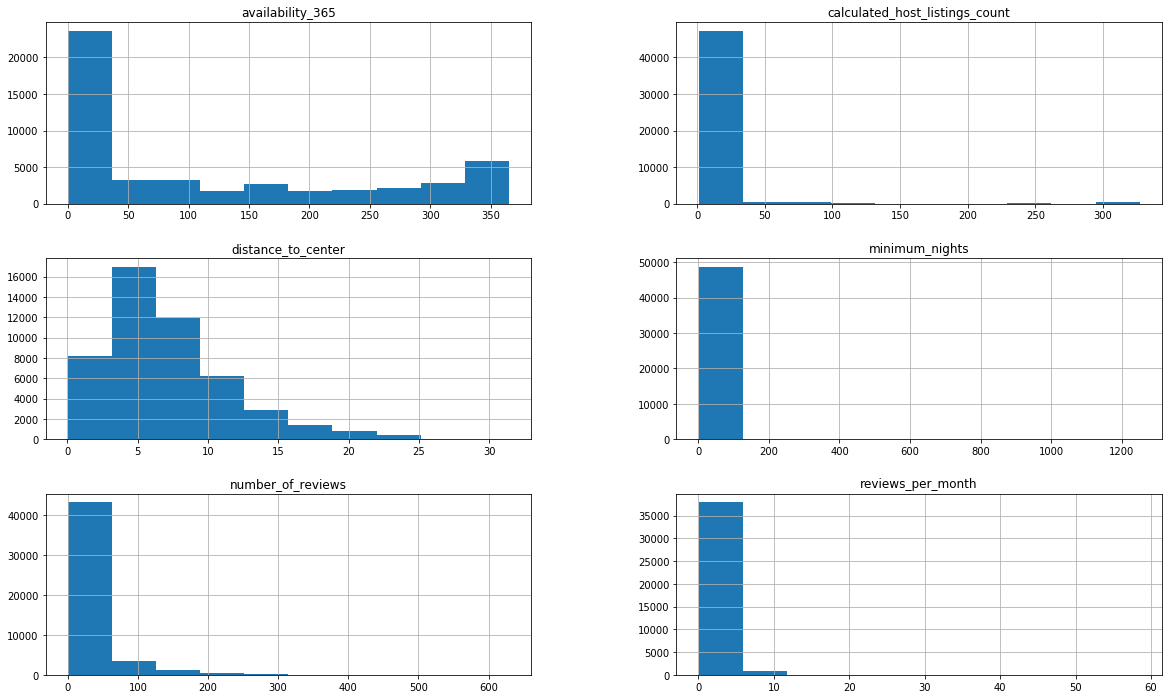

In [14]:
df.drop(['price','id','name','host_id','host_name','last_review'],axis=1).hist(figsize=(20, 12));

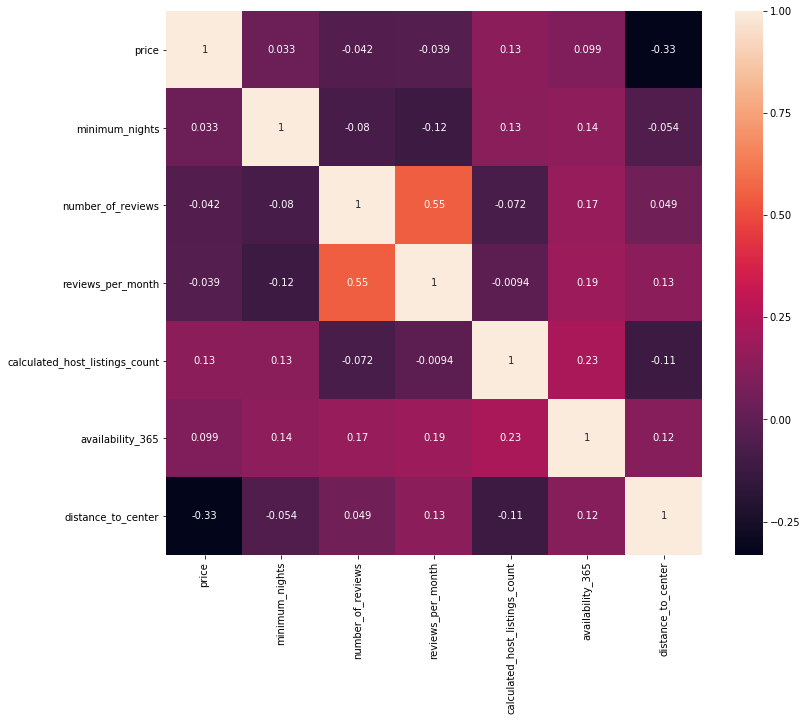

In [19]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True);

/Users/alexandrbagdasarov/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/alexandrbagdasarov/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


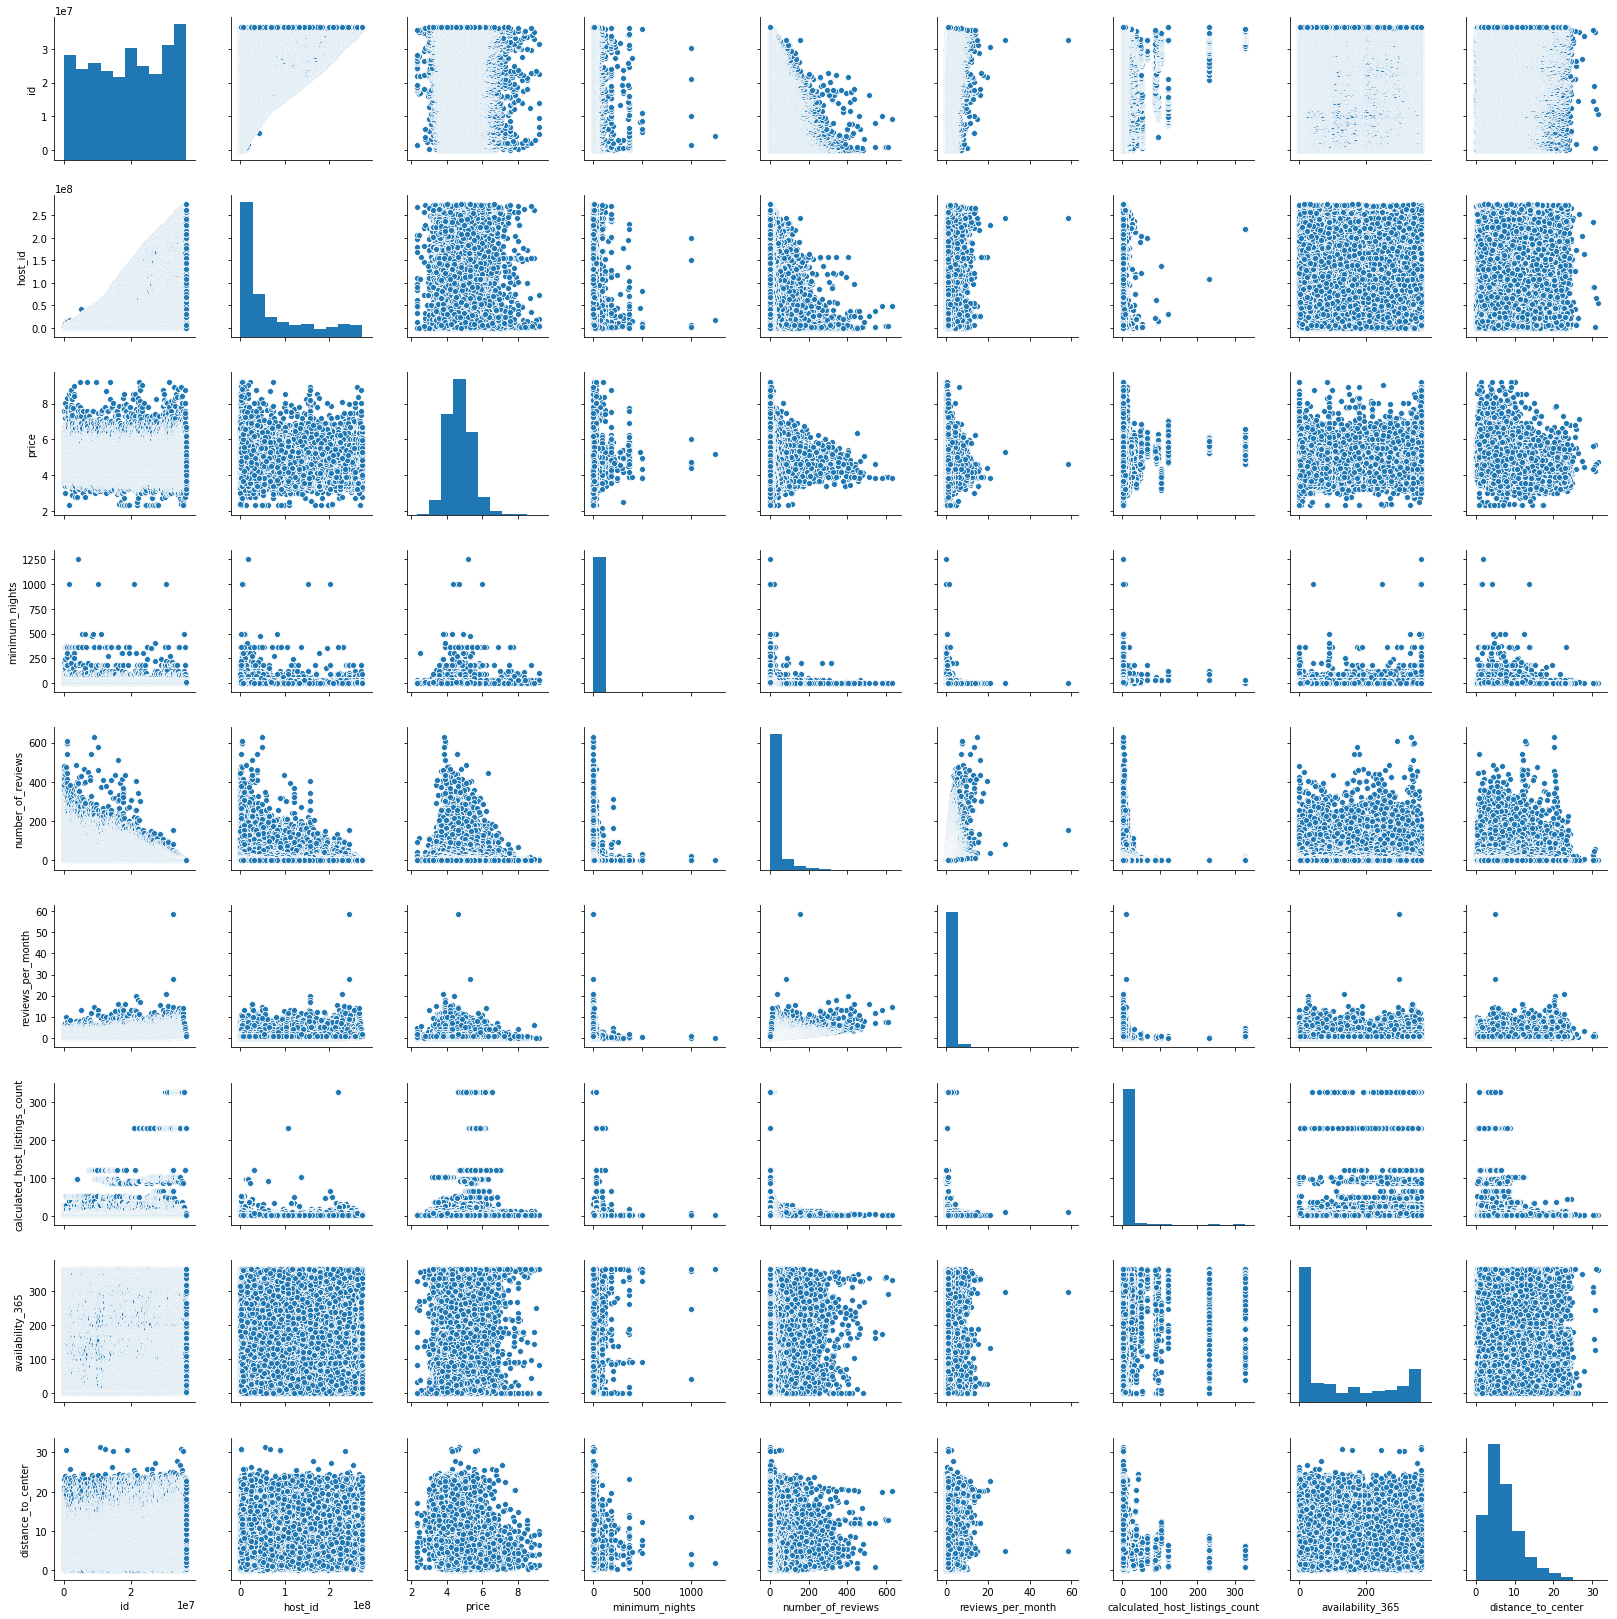

In [16]:
sns.pairplot(df)

In [17]:
df = df.drop(['id','name','host_id','host_name','last_review'], axis=1)
#решил дропнуть эти поля, так как особой корелляции нет с ценой вроде как

In [18]:
df['neighbourhood_group'].value_counts()

Manhattan        21660
Brooklyn         20095
Queens            5666
Bronx             1090
Staten Island      373
Name: neighbourhood_group, dtype: int64

__Меняем текстовые значения районов на коды:__
<br>
0 - Manhattan 
<br>
1 - Brooklyn
<br>
2 - Queens
<br>
3 - Bronx
<br>
4 - Staten Island

In [20]:
df_copy = df
df_copy = df_copy.replace(to_replace=["Manhattan","Brooklyn","Queens","Bronx","Staten Island"], value=[0,1,2,3,4])
#кароч, я хз, что за проблемы были, но до замены названий районов на коды, не мог построить графики, которые идут ниже
#а вот с room_type такой фигни не было, поэтому сразу графики построил
df_copy.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,distance_to_center
0,1,Kensington,Private room,5.003946,1,9,0.21,6,365,7.862918
1,0,Midtown,Entire home/apt,5.416100,1,45,0.38,2,355,4.500431
2,0,Harlem,Private room,5.010635,3,0,NaN,1,365,11.533367
3,1,Clinton Hill,Entire home/apt,4.488636,1,270,4.64,1,194,4.753027
4,0,East Harlem,Entire home/apt,4.382027,10,9,0.10,1,0,10.406881


In [21]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48884 entries, 0 to 48894
Data columns (total 10 columns):
neighbourhood_group               48884 non-null int64
neighbourhood                     48884 non-null object
room_type                         48884 non-null object
price                             48884 non-null float64
minimum_nights                    48884 non-null int64
number_of_reviews                 48884 non-null int64
reviews_per_month                 38833 non-null float64
calculated_host_listings_count    48884 non-null int64
availability_365                  48884 non-null int64
distance_to_center                48884 non-null float64
dtypes: float64(3), int64(5), object(2)
memory usage: 5.4+ MB


In [22]:
df_copy['neighbourhood_group'].value_counts()

0    21660
1    20095
2     5666
3     1090
4      373
Name: neighbourhood_group, dtype: int64

/Users/alexandrbagdasarov/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


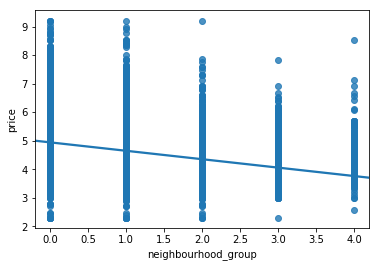

In [23]:
sns.regplot(x="neighbourhood_group", y="price", data=df_copy)

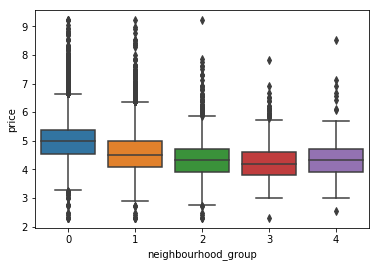

In [24]:
sns.boxplot(x="neighbourhood_group", y="price", data=df_copy)

In [25]:
df_copy['room_type'].value_counts()

Entire home/apt    25407
Private room       22319
Shared room         1158
Name: room_type, dtype: int64

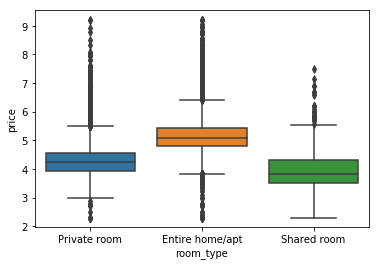

In [26]:
sns.boxplot(x="room_type", y="price", data=df_copy)

In [27]:
df_copy = df #возвращаем обратно все значения - эта копия еще пригодится
#df = df.replace(to_replace=["Entire home/apt","Private room","Shared room"], value=[0,1,2])
#df.head()
df = df.drop('neighbourhood', axis=1)
df = df.fillna(0)

__делаем OneHotEncoding для столбца neighbourhood_group__

In [28]:
# Сделали OHE для категориальной переменной
df_categor = pd.get_dummies(df['neighbourhood_group'], drop_first=True, prefix='neighbourhood_group')

# Объединили назад наши таблички
df = pd.concat([df.drop('neighbourhood_group',axis=1),df_categor], axis=1)
df.head()

,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,distance_to_center,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,Private room,5.003946,1,9,0.21,6,365,7.862918,1,0,0,0
1,Entire home/apt,5.416100,1,45,0.38,2,355,4.500431,0,1,0,0
2,Private room,5.010635,3,0,0.00,1,365,11.533367,0,1,0,0
3,Entire home/apt,4.488636,1,270,4.64,1,194,4.753027,1,0,0,0
4,Entire home/apt,4.382027,10,9,0.10,1,0,10.406881,0,1,0,0


__повторяем OneHotEncoding для столбца room_type__

In [29]:
# Сделали OHE для категориальной переменной
df_categor = pd.get_dummies(df['room_type'], drop_first=True, prefix='room_type')

# Объединили назад наши таблички
df = pd.concat([df.drop('room_type',axis=1),df_categor], axis=1)
df.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,distance_to_center,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,5.003946,1,9,0.21,6,365,7.862918,1,0,0,0,1,0
1,5.416100,1,45,0.38,2,355,4.500431,0,1,0,0,0,0
2,5.010635,3,0,0.00,1,365,11.533367,0,1,0,0,1,0
3,4.488636,1,270,4.64,1,194,4.753027,1,0,0,0,0,0
4,4.382027,10,9,0.10,1,0,10.406881,0,1,0,0,0,0


__ну а теперь делим данные__

In [30]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.3)

__скалируем данные__

In [31]:
from sklearn.preprocessing import StandardScaler

# объявили скалировщик!
scaler = StandardScaler()

# учим скалировщик скалировать все переменны на трэйне
scaler.fit(df_train[['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
                     'availability_365','distance_to_center']])

/Users/alexandrbagdasarov/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [32]:
# Применяем скалировщик к трэйну
df_train_scale = scaler.transform(df_train[['minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                                            'calculated_host_listings_count','availability_365','distance_to_center']])

# Применяем скалирвощик к тесту 
df_test_scale = scaler.transform(df_test[['minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                                          'calculated_host_listings_count','availability_365','distance_to_center']])

/Users/alexandrbagdasarov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/alexandrbagdasarov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [33]:
# Заменяем значения на отскалированные
df_train[['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
          'availability_365','distance_to_center']] = df_train_scale
df_test[['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
         'availability_365','distance_to_center']] = df_test_scale

/Users/alexandrbagdasarov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/alexandrbagdasarov/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/alexandrbagdasarov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [34]:
df_train.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,distance_to_center,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
25355,4.653960,-0.205590,1.089961,1.244513,-0.185603,1.301798,0.354463,0,0,1,0,0,0
18016,3.891820,-0.154618,2.590332,1.743215,-0.154592,1.256315,0.869498,0,1,0,0,0,0
13262,4.727388,-0.205590,3.431449,1.830488,-0.185603,-0.381071,-0.169099,1,0,0,0,0,0
41234,4.499810,-0.307534,-0.433144,0.109967,-0.185603,1.642920,-1.153378,0,1,0,0,1,0
45662,5.075174,-0.205590,-0.524075,-0.675488,-0.185603,0.088919,0.320708,1,0,0,0,0,0


In [35]:
print(df_train.shape) # Посмотрим на размеры трэйна и теста 
print(df_test.shape) 

(34218, 13)
(14666, 13)


In [36]:
# Вытаскиваем цены и параметры квартир по разным переменным для удобства 

y_train = df_train.price 
y_test = df_test.price 

X_train = df_train.drop('price', axis=1).get_values()
X_test = df_test.drop('price', axis=1).get_values()

__Константный прогноз__

In [37]:
y_mean = np.mean(y_train)                     # посчитали среднее 
y_pred_naive = np.ones(len(y_test)) * y_mean  # спрогнозировали им цену всех квартир в тестовой выборке
y_pred_naive[:5]

array([4.72686343, 4.72686343, 4.72686343, 4.72686343, 4.72686343])

In [38]:
from sklearn import metrics

In [39]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test, y_pred_naive)

11.947632940667546

In [40]:
def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
    print('R2:',  metrics.r2_score(np.exp(y_test), np.exp(y_pred)))
    print('MAPE:', mean_absolute_percentage_error(np.exp(y_test), np.exp(y_pred)))
    pass

In [41]:
print_metrics(y_test, y_pred_naive)

MAE: 83.61153569796004
RMSE: 224.15800770607805
R2: -0.031495404137489524
MAPE: 61.06965050894368


__первая регрессия__

In [42]:
from sklearn.linear_model import LinearRegression

# Объявили модель
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке 
model_regression.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_regr = model_regression.predict(X_test)

In [43]:
print_metrics(y_test,y_pred_regr)

MAE: 61.219046023751844
RMSE: 208.33938749787555
R2: 0.10895108157056121
MAPE: 35.77204149273055


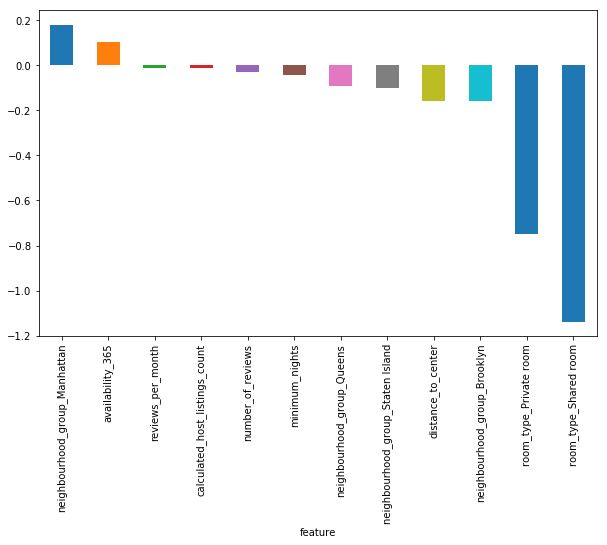

In [44]:
featureImportance = pd.DataFrame({"feature": df.drop('price',axis=1).columns, 
                                  "importance": model_regression.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(10, 6));

In [45]:
from sklearn.linear_model import Lasso

# Объявили модель
model_simplelasso = Lasso(random_state=42)

# Обучили модель на тренировочной выборке 
model_simplelasso.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_lasso = model_simplelasso.predict(X_test)

In [46]:
from sklearn.model_selection import GridSearchCV

# Решётака для перебора параметра 
param_grid = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 0.8, 1, 5, 10]}

# Объявили модель 
model_lasso = Lasso(random_state=42) 

# Объявили перебор 
grid_cv_lasso = GridSearchCV(model_lasso, param_grid, cv = 5)
grid_cv_lasso.fit(X_train, y_train)
print('Лучшее значение параметра:', grid_cv_lasso.best_params_)

# Сделали прогнозы
y_pred_lasso = grid_cv_lasso.predict(X_test)

Лучшее значение параметра: {'alpha': 0.001}


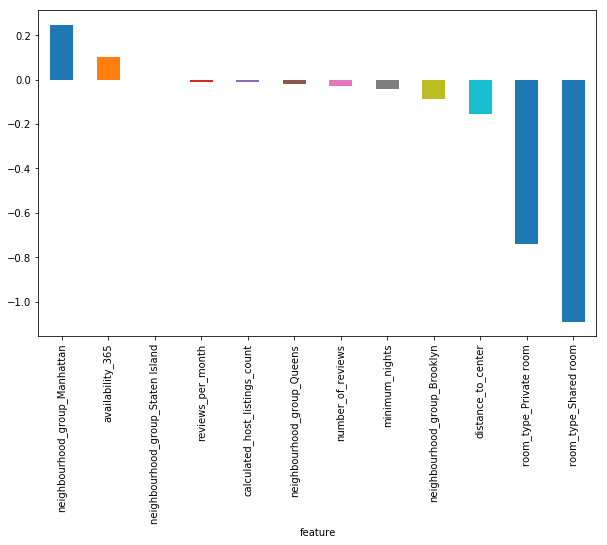

In [47]:
featureImportance = pd.DataFrame({"feature": df.drop('price',axis=1).columns, 
                                  "importance": grid_cv_lasso.best_estimator_.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(10, 6));

In [48]:
print_metrics(y_test,y_pred_lasso)

MAE: 61.17474738387991
RMSE: 208.46488316082954
R2: 0.10787729082015896
MAPE: 35.75828829093349


In [49]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train, y_train)
print('Лучшее значение параметра:', lasso_cv.alpha_)

# Сделали прогнозы
y_pred_lasso_cv = lasso_cv.predict(X_test)

Лучшее значение параметра: 0.00022986306941410087


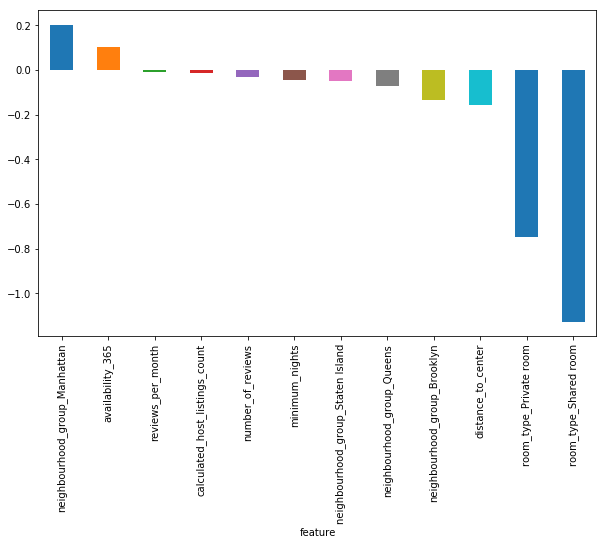

In [50]:
featureImportance = pd.DataFrame({"feature": df.drop('price',axis=1).columns, 
                                  "importance": lasso_cv.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(10, 6));

так вот, если при OneHotEnconding не делать drop_first=True для df['room_type'] и df['neighbourhood_group'], то получатся следующие результаты (и не расчитывать из координат расстояние до центра). 


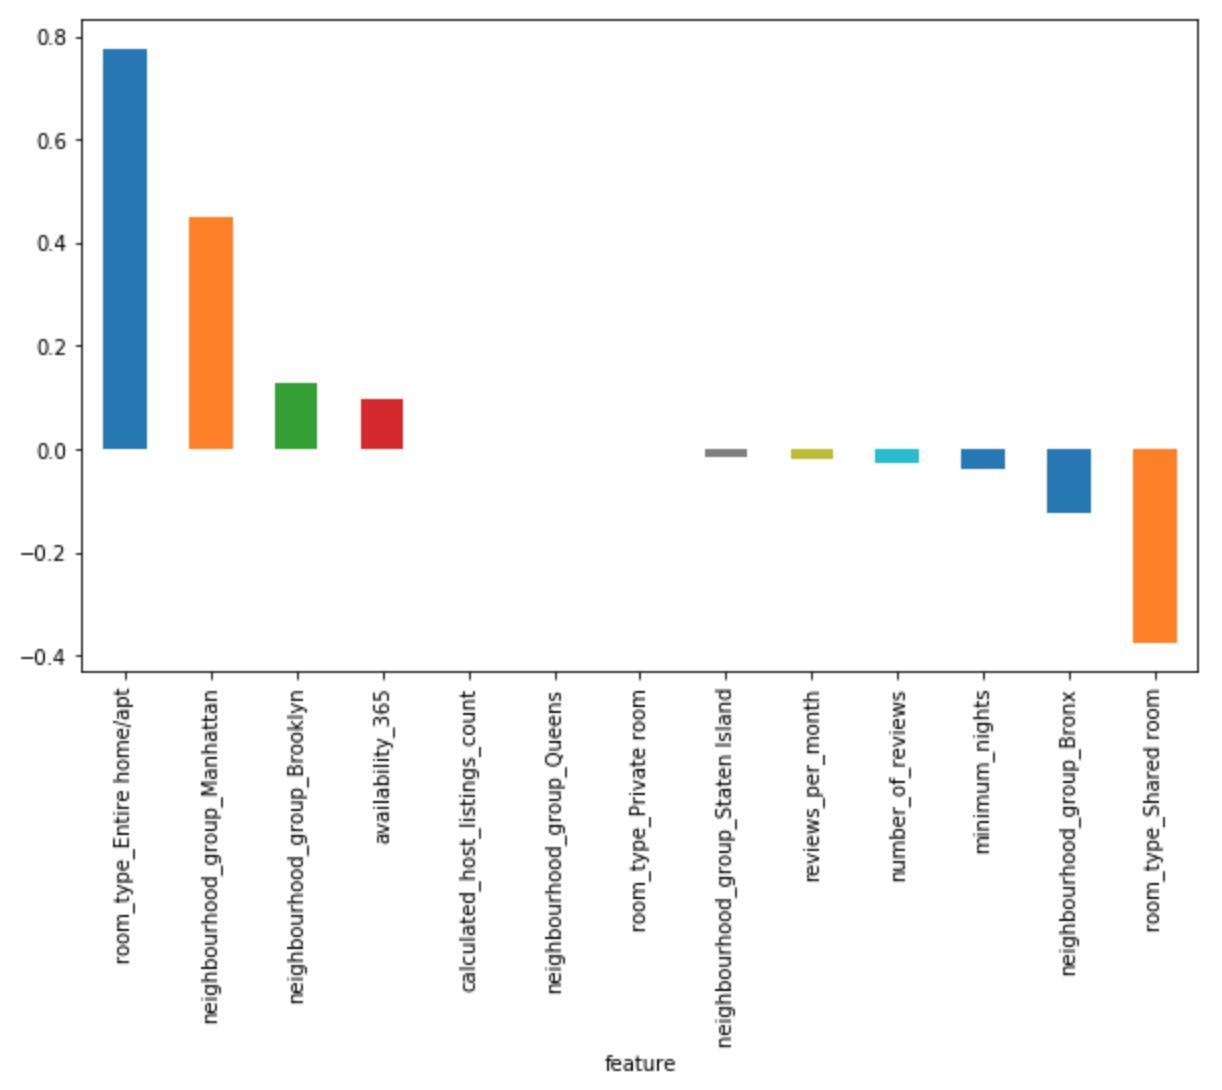

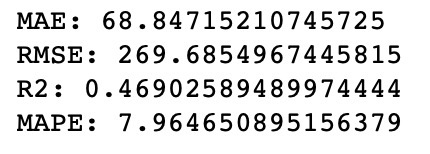

так что в принципе, задача по нахождению расстояния была увлекательной, но не скажу, что эта фича как-то уж сильно влияет на стоимость квартиры. Но хотя бы не нулевая зависимость, что уже хорошо